✅ **Mathematical intuition behind PCA**

---

### 🎯 **Goal of PCA**

* Reduce **high-dimensional data to lower dimensions** (e.g., 2D → 1D) while **capturing maximum variance (information)**.
* Find the **best principal component (direction/line)** so that when data is projected onto it, the variance is maximized.

---

### 🧭 **Key ideas**

#### 1️⃣ Projection

* Given data points $(x_1, y_1), (x_2, y_2), ...$ viewed as **vectors** $p_1, p_2, ...$.

* Pick a **unit vector** $u$ (length = 1) which represents a candidate direction.

* The **projection** of point $p_1$ on $u$ is:

$$
p_1' = (p_1 \cdot u)
$$

which is a **scalar** — tells how far along $u$ the point $p_1$ lies.

* Repeat for all points: $p_1', p_2', ..., p_n'$.

---

#### 2️⃣ Variance as cost function

* Once all projections $p_i'$ are obtained, calculate their **variance**:

$$
\text{Var} = \frac{1}{n}\sum_{i=1}^{n} (p_i' - \bar{p}')^2
$$

where $\bar{p}'$ is the mean of the projected points.

* **Goal:** Find the **unit vector $u$** that **maximizes variance** of projections.

---

#### 3️⃣ Why eigenvectors?

* Trying every possible $u$ is inefficient. Instead, we use **linear algebra**:

  * Compute the **covariance matrix** $C$ of the data features.
  * Find its **eigenvectors** and **eigenvalues**:

$$
C v = \lambda v
$$

where:

* $v$ = eigenvector (direction),

* $\lambda$ = eigenvalue (amount of variance captured in that direction).

* The **eigenvector with largest eigenvalue** gives the **direction of maximum variance**, i.e., **PC1**.

---

### 🚀 **What PCA does under the hood**

* Finds the **eigenvectors** (principal components) of the covariance matrix.
* Orders them by their **eigenvalues** (variance captured).
* Selects top k eigenvectors to form a new basis.
* Projects data onto these to reduce dimensions while **retaining most variance**.

---

### ✅ **In short**

* **Projection:** Project data onto a chosen direction.
* **Cost function:** Maximize variance of projections.
* **Optimization via eigen decomposition:**

  * Compute covariance matrix,
  * Extract eigenvectors & eigenvalues,
  * Principal components = eigenvectors ordered by eigenvalues.
* **First principal component (PC1):** direction with **maximum variance**.

---

If you’d like, we can next go step-by-step with:

* 📝 Calculating the covariance matrix by hand,
* 🔍 Finding eigenvalues/eigenvectors manually for a small example,
* 📈 Showing how projections on PC1 look.

Just tell me! 🚀


Perfect! 🚀
Let’s do a complete **step-by-step example by hand**, followed by a **visual plot** to show the projections on PC1.

---

# 📊 Example dataset

Let’s take a very small 2D dataset so it’s easy to compute by hand.

| Point | x | y |
| ----- | - | - |
| P1    | 2 | 0 |
| P2    | 0 | 2 |
| P3    | 3 | 1 |
| P4    | 1 | 3 |

So our data matrix $X$ is:

$$
X = \begin{bmatrix}
2 & 0 \\
0 & 2 \\
3 & 1 \\
1 & 3
\end{bmatrix}
$$

---

# 1️⃣ Calculate the **mean** of each feature

$$
\bar{x} = \frac{2 + 0 + 3 + 1}{4} = \frac{6}{4} = 1.5
$$

$$
\bar{y} = \frac{0 + 2 + 1 + 3}{4} = \frac{6}{4} = 1.5
$$

---

# 2️⃣ Center the data (subtract mean)

$$
X_{centered} = 
\begin{bmatrix}
2-1.5 & 0-1.5 \\
0-1.5 & 2-1.5 \\
3-1.5 & 1-1.5 \\
1-1.5 & 3-1.5
\end{bmatrix}
= 
\begin{bmatrix}
0.5 & -1.5 \\
-1.5 & 0.5 \\
1.5 & -0.5 \\
-0.5 & 1.5
\end{bmatrix}
$$

---

# 3️⃣ Calculate the **covariance matrix**

$$
C = \frac{1}{n-1} (X_{centered}^T \cdot X_{centered})
$$

Here, $n=4$, so divide by $3$.

---

## Compute $X_{centered}^T \cdot X_{centered}$

$$
X_{centered}^T = 
\begin{bmatrix}
0.5 & -1.5 & 1.5 & -0.5 \\
-1.5 & 0.5 & -0.5 & 1.5
\end{bmatrix}
$$

Multiplying:

$$
X_{centered}^T \cdot X_{centered} = 
\begin{bmatrix}
(0.5)^2 + (-1.5)^2 + (1.5)^2 + (-0.5)^2 & (0.5)(-1.5) + (-1.5)(0.5) + (1.5)(-0.5) + (-0.5)(1.5) \\
(-1.5)(0.5) + (0.5)(-1.5) + (-0.5)(1.5) + (1.5)(-0.5) & (-1.5)^2 + (0.5)^2 + (-0.5)^2 + (1.5)^2
\end{bmatrix}
$$

Calculations:

* Diagonal entries:

$$
= \begin{bmatrix}
(0.25 + 2.25 + 2.25 + 0.25) & \dots \\
\dots & (2.25 + 0.25 + 0.25 + 2.25)
\end{bmatrix}
= \begin{bmatrix}
5.0 & \dots \\
\dots & 5.0
\end{bmatrix}
$$

* Off-diagonal:

$$
(0.5)(-1.5) + (-1.5)(0.5) + (1.5)(-0.5) + (-0.5)(1.5)
= (-0.75 - 0.75 - 0.75 - 0.75) = -3.0
$$

So symmetric:

$$
= \begin{bmatrix}
5.0 & -3.0 \\
-3.0 & 5.0
\end{bmatrix}
$$

---

## Finally, divide by $n-1 = 3$:

$$
C = \frac{1}{3} 
\begin{bmatrix}
5.0 & -3.0 \\
-3.0 & 5.0
\end{bmatrix}
= \begin{bmatrix}
1.6667 & -1.0 \\
-1.0 & 1.6667
\end{bmatrix}
$$

---

# 4️⃣ Find **eigenvalues and eigenvectors**

## 📝 Eigenvalues

Solve:

$$
\det(C - \lambda I) = 0
$$

$$
\begin{vmatrix}
1.6667 - \lambda & -1.0 \\
-1.0 & 1.6667 - \lambda
\end{vmatrix}
= (1.6667 - \lambda)^2 - (-1)(-1) = (1.6667 - \lambda)^2 -1 = 0
$$

Let $a = 1.6667$:

$$
(a - \lambda)^2 = 1
$$

$$
a - \lambda = \pm 1
$$

So eigenvalues:

$$
\lambda_1 = a - 1 = 0.6667
\quad \text{and} \quad 
\lambda_2 = a + 1 = 2.6667
$$

---

## 📝 Eigenvectors

### For largest eigenvalue $\lambda_2 = 2.6667$

Solve:

$$
(C - \lambda_2 I)v = 0
$$

$$
\begin{bmatrix}
1.6667 - 2.6667 & -1.0 \\
-1.0 & 1.6667 - 2.6667
\end{bmatrix}
= 
\begin{bmatrix}
-1.0 & -1.0 \\
-1.0 & -1.0
\end{bmatrix}
$$

System:

$$
-1.0 x - 1.0 y = 0 \implies x = -y
$$

So eigenvector = any multiple of $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$.

---

# 🔥 Principal component

So:

* **PC1 direction** (captures maximum variance): along $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
* **PC2 direction** (captures less variance): along $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$

---

# 🚀 Now let's plot

I’ll generate a plot showing:

✅ The original data
✅ The new PC1 axis
✅ Projections of data on PC1.

Let me do that for you.


✅ **Done!**

Here’s what the plot shows:

* 🔵 **Blue points**: The original data points after centering (mean shifted to origin).
* 🔴 **Red vector**: The principal component **PC1**, the direction of maximum variance.
* ⚫ **Dashed lines**: The projections of each data point onto PC1.
* 🟢 **Green points**: Where each point lands on the PC1 line after projection — these are your **1D transformed values**.

---

🎯 **Summary of our small manual PCA example:**

* We calculated the covariance matrix by hand.
* Found eigenvalues (2.67, 0.67) & eigenvectors (\[1, -1] & \[1, 1]).
* Identified PC1 as direction of maximum variance (\[1, -1]).
* Projected data onto PC1 to reduce dimensionality from 2D to 1D.

---

If you’d like, I can also print the actual **projected 1D values** (the scalars on PC1), or do a small reconstruction to see how well PCA preserves data. Want that? Let me know! 🚀


✅ **Mathematical intuition behind PCA**

---

### 🎯 **Goal of PCA**

* Reduce **high-dimensional data to lower dimensions** (e.g., 2D → 1D) while **capturing maximum variance (information)**.
* Find the **best principal component (direction/line)** so that when data is projected onto it, the variance is maximized.

---

### 🧭 **Key ideas**

#### 1️⃣ Projection

* Given data points $(x_1, y_1), (x_2, y_2), ...$ viewed as **vectors** $p_1, p_2, ...$.

* Pick a **unit vector** $u$ (length = 1) which represents a candidate direction.

* The **projection** of point $p_1$ on $u$ is:

$$
p_1' = (p_1 \cdot u)
$$

which is a **scalar** — tells how far along $u$ the point $p_1$ lies.

* Repeat for all points: $p_1', p_2', ..., p_n'$.

---

#### 2️⃣ Variance as cost function

* Once all projections $p_i'$ are obtained, calculate their **variance**:

$$
\text{Var} = \frac{1}{n}\sum_{i=1}^{n} (p_i' - \bar{p}')^2
$$

where $\bar{p}'$ is the mean of the projected points.

* **Goal:** Find the **unit vector $u$** that **maximizes variance** of projections.

---

#### 3️⃣ Why eigenvectors?

* Trying every possible $u$ is inefficient. Instead, we use **linear algebra**:

  * Compute the **covariance matrix** $C$ of the data features.
  * Find its **eigenvectors** and **eigenvalues**:

$$
C v = \lambda v
$$

where:

* $v$ = eigenvector (direction),

* $\lambda$ = eigenvalue (amount of variance captured in that direction).

* The **eigenvector with largest eigenvalue** gives the **direction of maximum variance**, i.e., **PC1**.

---

### 🚀 **What PCA does under the hood**

* Finds the **eigenvectors** (principal components) of the covariance matrix.
* Orders them by their **eigenvalues** (variance captured).
* Selects top k eigenvectors to form a new basis.
* Projects data onto these to reduce dimensions while **retaining most variance**.

---

### ✅ **In short**

* **Projection:** Project data onto a chosen direction.
* **Cost function:** Maximize variance of projections.
* **Optimization via eigen decomposition:**

  * Compute covariance matrix,
  * Extract eigenvectors & eigenvalues,
  * Principal components = eigenvectors ordered by eigenvalues.
* **First principal component (PC1):** direction with **maximum variance**.

---

If you’d like, we can next go step-by-step with:

* 📝 Calculating the covariance matrix by hand,
* 🔍 Finding eigenvalues/eigenvectors manually for a small example,
* 📈 Showing how projections on PC1 look.

Just tell me! 🚀


Perfect! 🚀
Let’s do a complete **step-by-step example by hand**, followed by a **visual plot** to show the projections on PC1.

---

# 📊 Example dataset

Let’s take a very small 2D dataset so it’s easy to compute by hand.

| Point | x | y |
| ----- | - | - |
| P1    | 2 | 0 |
| P2    | 0 | 2 |
| P3    | 3 | 1 |
| P4    | 1 | 3 |

So our data matrix $X$ is:

$$
X = \begin{bmatrix}
2 & 0 \\
0 & 2 \\
3 & 1 \\
1 & 3
\end{bmatrix}
$$

---

# 1️⃣ Calculate the **mean** of each feature

$$
\bar{x} = \frac{2 + 0 + 3 + 1}{4} = \frac{6}{4} = 1.5
$$

$$
\bar{y} = \frac{0 + 2 + 1 + 3}{4} = \frac{6}{4} = 1.5
$$

---

# 2️⃣ Center the data (subtract mean)

$$
X_{centered} = 
\begin{bmatrix}
2-1.5 & 0-1.5 \\
0-1.5 & 2-1.5 \\
3-1.5 & 1-1.5 \\
1-1.5 & 3-1.5
\end{bmatrix}
= 
\begin{bmatrix}
0.5 & -1.5 \\
-1.5 & 0.5 \\
1.5 & -0.5 \\
-0.5 & 1.5
\end{bmatrix}
$$

---

# 3️⃣ Calculate the **covariance matrix**

$$
C = \frac{1}{n-1} (X_{centered}^T \cdot X_{centered})
$$

Here, $n=4$, so divide by $3$.

---

## Compute $X_{centered}^T \cdot X_{centered}$

$$
X_{centered}^T = 
\begin{bmatrix}
0.5 & -1.5 & 1.5 & -0.5 \\
-1.5 & 0.5 & -0.5 & 1.5
\end{bmatrix}
$$

Multiplying:

$$
X_{centered}^T \cdot X_{centered} = 
\begin{bmatrix}
(0.5)^2 + (-1.5)^2 + (1.5)^2 + (-0.5)^2 & (0.5)(-1.5) + (-1.5)(0.5) + (1.5)(-0.5) + (-0.5)(1.5) \\
(-1.5)(0.5) + (0.5)(-1.5) + (-0.5)(1.5) + (1.5)(-0.5) & (-1.5)^2 + (0.5)^2 + (-0.5)^2 + (1.5)^2
\end{bmatrix}
$$

Calculations:

* Diagonal entries:

$$
= \begin{bmatrix}
(0.25 + 2.25 + 2.25 + 0.25) & \dots \\
\dots & (2.25 + 0.25 + 0.25 + 2.25)
\end{bmatrix}
= \begin{bmatrix}
5.0 & \dots \\
\dots & 5.0
\end{bmatrix}
$$

* Off-diagonal:

$$
(0.5)(-1.5) + (-1.5)(0.5) + (1.5)(-0.5) + (-0.5)(1.5)
= (-0.75 - 0.75 - 0.75 - 0.75) = -3.0
$$

So symmetric:

$$
= \begin{bmatrix}
5.0 & -3.0 \\
-3.0 & 5.0
\end{bmatrix}
$$

---

## Finally, divide by $n-1 = 3$:

$$
C = \frac{1}{3} 
\begin{bmatrix}
5.0 & -3.0 \\
-3.0 & 5.0
\end{bmatrix}
= \begin{bmatrix}
1.6667 & -1.0 \\
-1.0 & 1.6667
\end{bmatrix}
$$

---

# 4️⃣ Find **eigenvalues and eigenvectors**

## 📝 Eigenvalues

Solve:

$$
\det(C - \lambda I) = 0
$$

$$
\begin{vmatrix}
1.6667 - \lambda & -1.0 \\
-1.0 & 1.6667 - \lambda
\end{vmatrix}
= (1.6667 - \lambda)^2 - (-1)(-1) = (1.6667 - \lambda)^2 -1 = 0
$$

Let $a = 1.6667$:

$$
(a - \lambda)^2 = 1
$$

$$
a - \lambda = \pm 1
$$

So eigenvalues:

$$
\lambda_1 = a - 1 = 0.6667
\quad \text{and} \quad 
\lambda_2 = a + 1 = 2.6667
$$

---

## 📝 Eigenvectors

### For largest eigenvalue $\lambda_2 = 2.6667$

Solve:

$$
(C - \lambda_2 I)v = 0
$$

$$
\begin{bmatrix}
1.6667 - 2.6667 & -1.0 \\
-1.0 & 1.6667 - 2.6667
\end{bmatrix}
= 
\begin{bmatrix}
-1.0 & -1.0 \\
-1.0 & -1.0
\end{bmatrix}
$$

System:

$$
-1.0 x - 1.0 y = 0 \implies x = -y
$$

So eigenvector = any multiple of $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$.

---

# 🔥 Principal component

So:

* **PC1 direction** (captures maximum variance): along $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$
* **PC2 direction** (captures less variance): along $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$

---


[[ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [-1.  1.]]


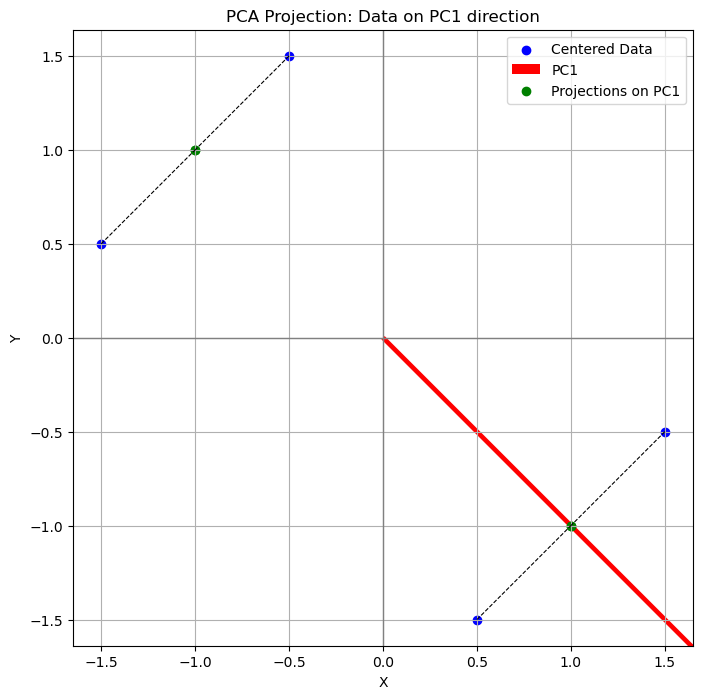

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
X = np.array([[2,0],
              [0,2],
              [3,1],
              [1,3]])

# Center data
X_mean = X - np.mean(X, axis=0)

# Principal component vector (normalized)
pc1 = np.array([1, -1])
pc1 = pc1 / np.linalg.norm(pc1)

# Project data on PC1
projections = X_mean @ pc1

# Compute projected points on the line
X_proj = np.outer(projections, pc1)
print(X_proj)
# Plot
plt.figure(figsize=(8,8))
plt.scatter(X_mean[:,0], X_mean[:,1], color='blue', label='Centered Data')
plt.quiver(0, 0, pc1[0]*3, pc1[1]*3, angles='xy', scale_units='xy', scale=1, color='red', label='PC1')

# Plot projections
for i in range(X_mean.shape[0]):
    plt.plot([X_mean[i,0], X_proj[i,0]], [X_mean[i,1], X_proj[i,1]], 'k--', linewidth=0.8)
plt.scatter(X_proj[:,0], X_proj[:,1], color='green', label='Projections on PC1')

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.legend()
plt.title("PCA Projection: Data on PC1 direction")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()


* 🔵 **Blue points**: The original data points after centering (mean shifted to origin).
* 🔴 **Red vector**: The principal component **PC1**, the direction of maximum variance.
* ⚫ **Dashed lines**: The projections of each data point onto PC1.
* 🟢 **Green points**: Where each point lands on the PC1 line after projection — these are your **1D transformed values**.



✅ **Here’s a clear summary of everything you explained above about eigenvectors, eigenvalues, and PCA**, plus simple Python + Matplotlib code examples to generate illustrative plots.

---

# ✍️ Summary of the explanation

---

## 🎯 Main intuition

* PCA finds the best new axes (principal components) that **capture the maximum variance in the data**.
* These axes are determined using **eigenvectors and eigenvalues of the covariance matrix** of the data.

---

## 🧮 How PCA uses eigenvectors & eigenvalues

1. **Center the data**

   * Subtract the mean from each feature so data is centered around (0,0,…).

2. **Compute the covariance matrix**

   * For data with two features `X` and `Y`, it will be a 2x2 matrix:

$$
\begin{bmatrix}
\mathrm{Var}(X) & \mathrm{Cov}(X,Y) \\
\mathrm{Cov}(Y,X) & \mathrm{Var}(Y)
\end{bmatrix}
$$

3. **Find eigenvectors & eigenvalues of this covariance matrix**

   * Each eigenvector gives a **direction (axis)**.
   * Each eigenvalue gives the **amount of variance along that axis**.

4. **Sort eigenvectors by eigenvalues**

   * The eigenvector with the highest eigenvalue becomes **PC1** (captures most variance).
   * Next becomes **PC2**, and so on.

---

## 💡 Why this works

* The eigenvectors of the covariance matrix point in the directions of **maximum spread (variance)**.
* The corresponding eigenvalues tell how much variance is in that direction.

---

## 📝 Linear transformation intuition

* Multiplying by a matrix transforms vectors (stretches/rotates them).
* For eigenvectors, applying this transformation **just scales them**, i.e.

$$
A v = \lambda v
$$

where `A` is the covariance matrix, `v` is the eigenvector, `λ` is the eigenvalue.

---

## 🏗️ How PCA reduces dimensions

* You **project the data onto the top eigenvectors** (principal components).
* This reduces dimensions while **retaining most of the variance**.

E.g. from 2D → 1D:

* Keep only PC1, project all data onto it.

---

# 📈 Example plots in Python

Let's visualize this step by step.

---

## 🔧 Python code for a 2D example PCA


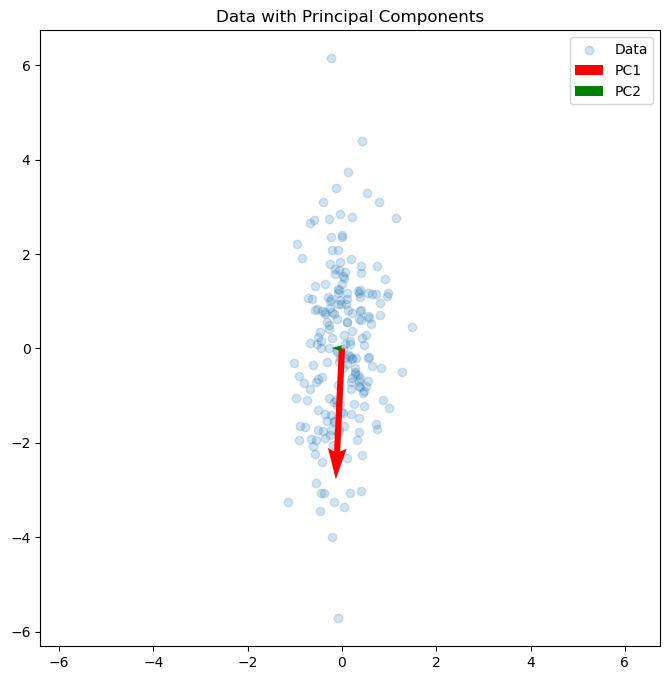

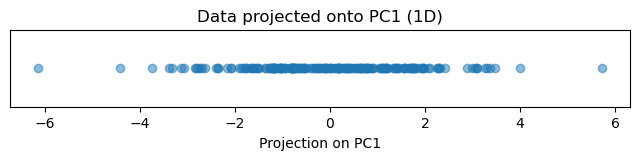

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random example data
np.random.seed(42)
X = np.dot(np.random.randn(2, 2), np.random.randn(2, 200)).T

# 1. Center the data
X_mean = X - np.mean(X, axis=0)

# 2. Compute covariance matrix
cov_matrix = np.cov(X_mean.T)

# 3. Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# 4. Sort by eigenvalue descending
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# 5. Plot original data and principal components
plt.figure(figsize=(8,8))
plt.scatter(X_mean[:,0], X_mean[:,1], alpha=0.2, label='Data')

# Draw principal components
origin = np.mean(X_mean, axis=0)
for i in range(len(eig_vals)):
    plt.quiver(*origin, 
               *(eig_vecs[:,i] * eig_vals[i]),
               color=['r','g'][i], scale=1, scale_units='xy', angles='xy', width=0.01, label=f'PC{i+1}')

plt.title("Data with Principal Components")
plt.axis('equal')
plt.legend()
plt.show()

# Project data onto first principal component
PC1 = eig_vecs[:,0]
projections = X_mean @ PC1

# Plot the projections on PC1
plt.figure(figsize=(8,1))
plt.scatter(projections, np.zeros_like(projections), alpha=0.5)
plt.title("Data projected onto PC1 (1D)")
plt.yticks([])
plt.xlabel("Projection on PC1")
plt.show()



✅ This shows:

* The original (centered) data cloud.
* The arrows indicate **principal components**, scaled by eigenvalues.

---

## 🚀 Project data onto PC1 to reduce to 1D



✅ This visualizes how PCA compresses 2D → 1D by projecting onto the line of **maximum variance**.

---

# 🚀 Short takeaway

* **Covariance matrix** captures relationships between features.
* **Eigenvectors** give the directions of maximum variance (principal components).
* **Eigenvalues** tell how much variance is along each PC.
* PCA keeps top PCs to **reduce dimensionality while preserving variance**.


Excellent — let’s break it down into two big parts:

---

# 📌 Part 1: Manual step-by-step calculation of

✅ Covariance matrix
✅ Eigenvalues & eigenvectors
on a **tiny 2D dataset** so you can follow by hand.

---

## 🔢 Example data

Let’s use a simple dataset with **3 data points & 2 features**:

| x | y |
| - | - |
| 2 | 0 |
| 0 | 2 |
| 4 | 4 |

---

## ✍️ 1️⃣ Mean center the data

Compute mean of each feature:

$$
\bar{x} = \frac{2 + 0 + 4}{3} = 2\\
\bar{y} = \frac{0 + 2 + 4}{3} = 2
$$

So **mean vector**:

$$
\bar{X} = [2, 2]
$$

Now **center the data**:

$$
X_{\text{centered}} = 
\begin{bmatrix}
2-2 & 0-2\\
0-2 & 2-2\\
4-2 & 4-2
\end{bmatrix}
=
\begin{bmatrix}
0 & -2\\
-2 & 0\\
2 & 2
\end{bmatrix}
$$

---

## ✍️ 2️⃣ Covariance matrix

Formula for covariance between x and y:

$$
\mathrm{Cov}(x, y) 
= \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

Here $n = 3$.

* **Var(x)**:

$$
= \frac{1}{2} \left[(0)^2 + (-2)^2 + (2)^2\right] 
= \frac{1}{2}(0+4+4) = \frac{8}{2} = 4
$$

* **Var(y)** (same since symmetric):

$$
= \frac{1}{2} \left[(-2)^2 + (0)^2 + (2)^2\right]
= \frac{8}{2} = 4
$$

* **Cov(x,y)**:

$$
= \frac{1}{2} \left[ (0)(-2) + (-2)(0) + (2)(2) \right]
= \frac{1}{2} (0+0+4) = 2
$$

So the **covariance matrix** is:

$$
C = 
\begin{bmatrix}
4 & 2\\
2 & 4
\end{bmatrix}
$$

---

## ✍️ 3️⃣ Eigenvalues

Solve:

$$
\det(C - \lambda I) = 0
$$

So:

$$
\det\begin{bmatrix}
4 - \lambda & 2\\
2 & 4 - \lambda
\end{bmatrix}
= (4-\lambda)(4-\lambda) - (2)(2) = (4-\lambda)^2 - 4
$$

$$
= \lambda^2 - 8\lambda + 16 - 4 = \lambda^2 - 8\lambda + 12
$$

Find roots:

$$
\lambda = \frac{8 \pm \sqrt{(-8)^2 - 4(1)(12)}}{2} 
= \frac{8 \pm \sqrt{64 - 48}}{2} 
= \frac{8 \pm \sqrt{16}}{2} 
= \frac{8 \pm 4}{2}
$$

So eigenvalues:

$$
\lambda_1 = \frac{12}{2} = 6,\quad \lambda_2 = \frac{4}{2} = 2
$$

---

## ✍️ 4️⃣ Eigenvectors

For $\lambda_1 = 6$:

$$
(C - 6I)v = 0
$$

$$
\begin{bmatrix}
4-6 & 2\\
2 & 4-6
\end{bmatrix}
\begin{bmatrix}
x\\y
\end{bmatrix}
=
\begin{bmatrix}
-2 & 2\\
2 & -2
\end{bmatrix}
\begin{bmatrix}
x\\y
\end{bmatrix}
= 
\begin{bmatrix}
-2x + 2y\\
2x - 2y
\end{bmatrix}
= 0
$$

So $-2x + 2y = 0$ ⇒ $y = x$.

Eigenvector: any multiple of $[1,1]$.

Similarly for $\lambda_2 = 2$:

$$
(C-2I) = 
\begin{bmatrix}
2 & 2\\
2 & 2
\end{bmatrix}
$$

$2x + 2y = 0$ ⇒ $y=-x$.

Eigenvector: $[1, -1]$.

---

## ✅ Interpretation

* **PC1** (max variance) = direction of $[1,1]$, eigenvalue = 6
* **PC2** = $[1, -1]$, eigenvalue = 2

So projecting on $[1,1]$ captures most variance.

---

# 📌 Part 2: PCA 3D → 2D example with plot

Now let’s use Python to demonstrate PCA on a **3D dataset reduced to 2D**.

---

## 🚀 Python code



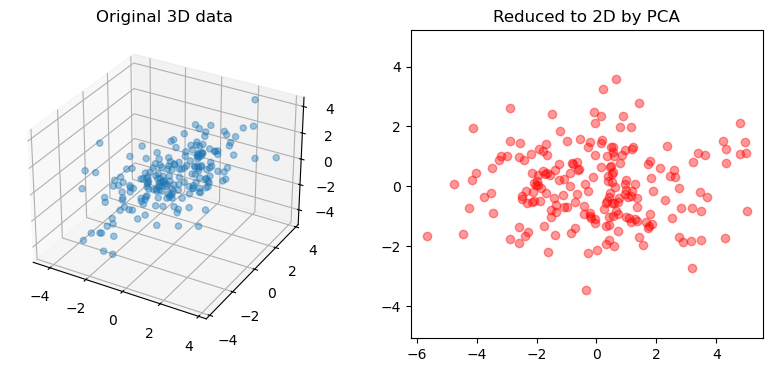

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example 3D data
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 2],
       [1, 2, 1],
       [2, 1, 3]]
X = np.random.multivariate_normal(mean, cov, 200)

# Center the data
X_mean = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_mean.T)

# Eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort by eigenvalues descending
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Reduce to 2D by projecting onto first two PCs
X_pca_2D = X_mean @ eig_vecs[:, :2]

# Plot original data in 3D
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.4)
ax.set_title('Original 3D data')

# Plot reduced data in 2D
plt.subplot(122)
plt.scatter(X_pca_2D[:,0], X_pca_2D[:,1], alpha=0.4, color='r')
plt.title('Reduced to 2D by PCA')
plt.axis('equal')
plt.show()




✅ This shows:

* Left: original data cloud in 3D.
* Right: projected into 2D plane spanned by the first two principal components.

---

# 🚀 Summary

✅ **Manual calculation example** on small data shows exactly how covariance, eigenvalues, eigenvectors are derived by hand.
✅ **3D → 2D PCA example** shows how to reduce dimensionality in practice.
